In [541]:
import os
import warnings
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sankeyflow import Sankey
from fuzzywuzzy import process

tqdm.pandas()
warnings.filterwarnings("ignore")
plt.style.use('dark_background')

In [542]:
students_path = "./major_minor/major_minor.csv"

In [543]:
df = pd.read_csv(students_path)
df.drop(["email", "name", "id"], axis=1)

,batch,status,major,minor,program,grad
0,ASP 2017-18,Graduated,NaN,NaN,ASP,2018.0
1,ASP 2017-18,Graduated,NaN,CW,ASP,2018.0
2,ASP 2017-18,Graduated,PSY,MS,ASP,2018.0
3,ASP 2017-18,Graduated,NaN,MAT,ASP,2018.0
4,ASP 2017-18,Graduated,PPE,ENG,ASP,2018.0
...,...,...,...,...,...,...
7797,UG 2024-28,Enrolled,NaN,NaN,UG,2028.0
7798,UG 2024-28,Enrolled,NaN,NaN,UG,2028.0
7799,UG 2024-28,Enrolled,NaN,NaN,UG,2028.0
7800,UG 2024-28,Enrolled,NaN,NaN,UG,2028.0


In [544]:
print(df["major"].value_counts())

major
PSY       933
ECO       657
ECOFIN    628
POL       491
CS        488
ENG       408
SOA       216
BIO       192
HIS       139
PHI       122
PHY       120
PPE       119
MAT       102
HISIR      96
ENGMS      88
ENGCW      55
CSENT      51
MATCS      42
CHM        12
ECOHIS     10
PSYPHI     10
FIN         6
POLSOC      4
ENGPA       3
PHICS       3
MS          2
IR          1
Name: count, dtype: int64


### Batch size over the years
Count of ug students by graduation year

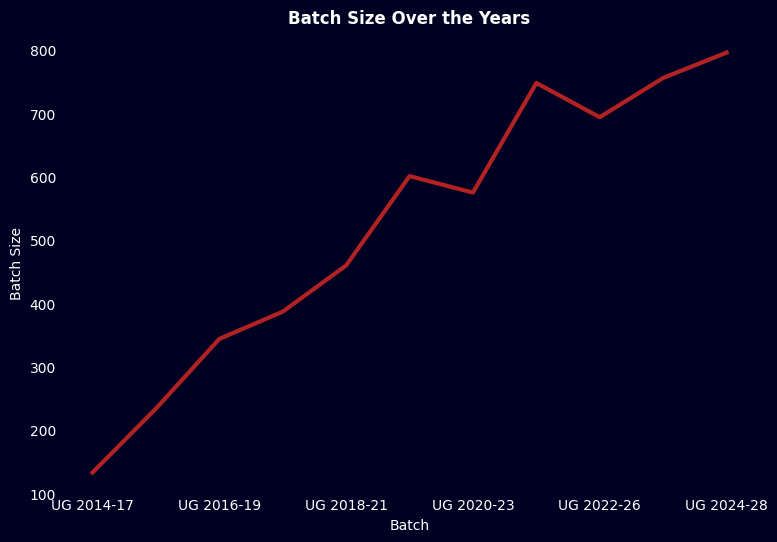

In [545]:
plt.figure(figsize=(9, 6))
ax = df[df["program"] == "UG"].groupby(["batch"])["batch"].count().plot(kind='line', linewidth=3, fontsize=10, color="firebrick", logy=False)
plt.title('Batch Size Over the Years', weight="bold", fontsize=12)

import matplotlib.ticker as ticker
# ax.plot(np.array(ax.get_xlim()), np.array(ax.get_ylim()), '--', color='lightcoral', linewidth=1)
ax.yaxis.set_minor_formatter(ticker.FormatStrFormatter('%d'))

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')

plt.xlabel('Batch', fontsize=10)
plt.ylabel('Batch Size', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.show()
# plt.savefig(f"./major_minor/batchsize.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
# plt.clf()

In [546]:
df[df["program"] == "UG"].groupby(["batch"])["batch"].count()

batch
UG 2014-17    133
UG 2015-18    234
UG 2016-19    344
UG 2017-20    387
UG 2018-21    460
UG 2019-22    601
UG 2020-23    575
UG 2021-24    748
UG 2022-26    694
UG 2023-27    756
UG 2024-28    796
Name: batch, dtype: int64

### Major/minor distributions
How number of students per major has changed over the years

In [547]:
df = df[df["status"] == "Graduated"]
df["major"] = df["major"].apply(lambda x: "CS" if x in ["CS", "MATCS", "CSENT"] else "ENG" if x in ["ENG", "ENGCW", "ENGMS"] else "HIS" if x in ["HIS", "HISIR"] else x)

In [548]:
ug17 = df[(df["batch"] == "UG 2014-17")]
ug24 = df[(df["batch"] == "UG 2021-24")]
majors = ['PSY', 'ECOFIN', 'ECO', 'CS', 'POL', 'BIO', 'SOA', 'HIS', 'ENG', 'PPE', 'ENGMS', 'ENGCW', 'PHY', 'MAT', 'HISIR', 'PHI', 'CSENT', 'MATCS']

ug17["major"] = ug17["major"].apply(lambda x: x if x in majors else "Other")
ug24["major"] = ug24["major"].apply(lambda x: x if x in majors else "Other")
ug24["major"] = ug24["major"].apply(lambda x: "CS" if x in ["CS", "MATCS", "CSENT"] else "ENG" if x in ["ENG", "ENGCW", "ENGMS"] else "HIS" if x in ["HIS", "HISIR"] else x)

ug17values = ug17["major"].value_counts()
ug24values = ug24["major"].value_counts()

majorcolors = {label: color  for label, color in zip(['ECO', 'ENG', 'CS', 'PSY', 'POL', 'MAT', 'HIS', 'HISIR', 'Other', 'PHI', 'PPE', 'ECOFIN', 'SOA', 'SOA','CSENT',  'MATCS', 'BIO', 'ENGCW', 'PHY'], (plt.get_cmap('viridis')(i / 16) for i in range(20)))}

fig, axes = plt.subplots(ncols=2, figsize=(12, 6), facecolor="#000022")
fig.suptitle("Distribution of undergraduate majors, UG17 vs UG24", weight="bold", x=0.5, y=0.95)
ug17values.plot.pie(ax=axes[0], fontsize=10, colors=[majorcolors[v] for v in ug17["major"].value_counts().keys()])
ug24values.plot.pie(ax=axes[1], fontsize=10, colors=[majorcolors[v] for v in ug24["major"].value_counts().keys()])
axes[0].set_axis_off()
axes[1].set_axis_off()

# plt.show()
plt.savefig(f"./images/majorpie.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
plt.clf()

<Figure size 1200x600 with 0 Axes>

In [549]:
ug17values

major
ECO       27
ENG       19
CS        17
PSY       14
POL       11
MAT        9
HIS        7
PHI        6
PPE        5
ECOFIN     4
SOA        4
Other      1
Name: count, dtype: int64

In [550]:
ug24values

major
ECOFIN    112
PSY       111
ECO        90
CS         64
ENG        51
POL        40
BIO        23
SOA        21
PPE        17
HIS        16
PHY        11
Other       8
MAT         6
PHI         1
Name: count, dtype: int64

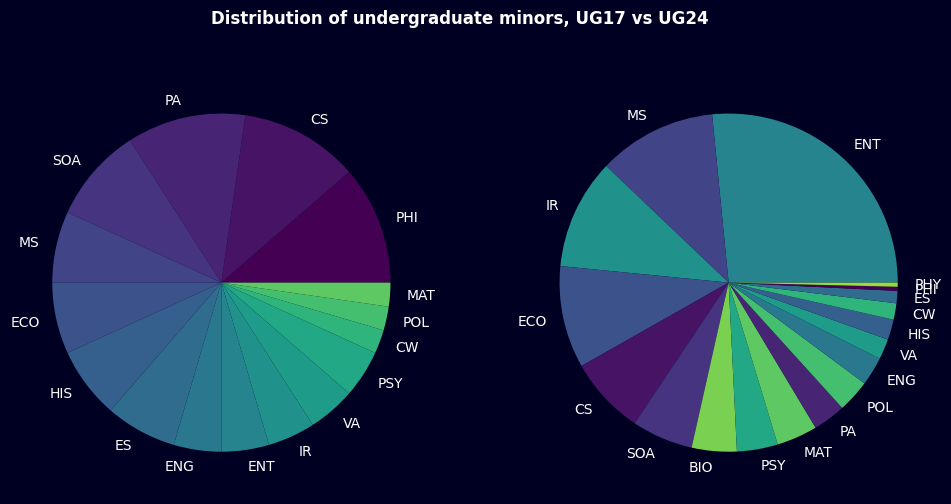

In [551]:
minors = ['PSY', 'ECO', 'FIN', 'CS', 'POL', 'BIO', 'SOA', 'ENG', 'MS', 'CW', 'PHY', 'MAT', 'IR', 'PHI', 'HIS', 'ENT', 'VA', 'PA', 'ES']

ug17["minor"] = ug17["minor"].apply(lambda x: x if x in minors else "None")
ug24["minor"] = ug24["minor"].apply(lambda x: x if x in minors else "None")
ug17minors = ug17[ug17["minor"] != "None"]["minor"].value_counts()
ug24minors = ug24[ug24["minor"] != "None"]["minor"].value_counts()

minorcolors = {label: color  for label, color in zip(['PHI', 'CS', 'PA', 'SOA', 'MS', 'ECO', 'HIS', 'ES', 'ENG', 'ENT', 'IR', 'VA', 'PSY', 'CW', 'POL', 'MAT', 'BIO', 'PHY', 'None'], (plt.get_cmap('viridis')(i / 20) for i in range(20)))}

fig, axes = plt.subplots(ncols=2, figsize=(12, 6), facecolor="#000022")
fig.suptitle("Distribution of undergraduate minors, UG17 vs UG24", weight="bold", x=0.5, y=0.95)
ug17minors.plot.pie(ax=axes[0], fontsize=10, colors=[minorcolors[v] for v in ug17minors.keys()])
ug24minors.plot.pie(ax=axes[1], fontsize=10, colors=[minorcolors[v] for v in ug24minors.keys()])
axes[0].set_axis_off()
axes[1].set_axis_off()

In [552]:
print(f'Share of ECO/ECOFIN/PSY majors in 2017: {len(ug17[ug17["major"].isin(["ECOFIN", "ECO", "PSY"])])/len(ug17)*100}')
print(f'Share of ECO/ECOFIN/PSY majors in 2024: {len(ug24[ug24["major"].isin(["ECOFIN", "ECO", "PSY"])])/len(ug24[ug24["major"].notna()])*100}')

Share of ECO/ECOFIN/PSY majors in 2017: 36.29032258064516
Share of ECO/ECOFIN/PSY majors in 2024: 54.81611208406305


In [553]:
print(f'Share of humanities majors in 2017: {len(ug17[ug17["major"].isin(["ENG", "POL", "PHI", "ENGMS", "ENGCW", "PPE", "HISIR", "SOA", "HIS"])])/len(ug17)*100}')
print(f'Share of humanities majors in 2024: {len(ug24[ug24["major"].isin(["ENG", "POL", "PHI", "ENGMS", "ENGCW", "PPE", "HISIR", "SOA", "HIS"])])/len(ug24[ug24["major"].notna()])*100}')

Share of humanities majors in 2017: 41.935483870967744
Share of humanities majors in 2024: 25.569176882662


In [554]:
print(f'Humanities students on campus in 2016-17: {df[(df["grad"] < 2020) & (df["major"].isin(["ENG", "POL", "PHI", "ENGMS", "PPE", "HISIR", "SOA", "HIS"]) | (df["minor"].isin(["ENG", "POL", "PHI", "MS", "SOA", "HIS", "IR", "ES"])))]["batch"].count() / df[df["grad"] < 2020]["batch"].count() * 100}')
print(f'Humanities students on campus in 2022-23: {df[(df["grad"] < 2026) & (df["grad"] > 2022) & (df["major"].isin(["ENG", "POL", "PHI", "ENGMS", "PPE", "HISIR", "SOA", "HIS"]) | (df["minor"].isin(["ENG", "POL", "PHI", "MS", "SOA", "HIS", "IR", "ES"])))]["batch"].count() / df[(df["grad"] < 2026) & (df["grad"] > 2022)]["batch"].count() * 100}')

Humanities students on campus in 2016-17: 51.08323831242873
Humanities students on campus in 2022-23: 32.90067720090293


In [555]:
print(f'STEM students on campus in 2019: {df[(df["grad"] < 2020) & (df["major"].isin(["CS", "MAT", "BIO", "PHY", "CHM", "CSMAT", "CSENT"]) | (df["minor"].isin(["CS", "MAT", "BIO", "PHY", "CHM", "CSMAT", "CSENT"])))]["batch"].count() / df[df["grad"] < 2020]["batch"].count() * 100}')
print(f'STEM students on campus in 2022: {df[(df["grad"] < 2026) & (df["grad"] > 2022) & (df["major"].isin(["CS", "MAT", "BIO", "PHY", "CHM", "CSMAT", "CSENT"]) | (df["minor"].isin(["CS", "MAT", "BIO", "PHY", "CHM", "CSMAT", "CSENT"])))]["batch"].count() / df[(df["grad"] < 2026) & (df["grad"] > 2022)]["batch"].count() * 100}')

STEM students on campus in 2019: 17.787913340935006
STEM students on campus in 2022: 21.613995485327315


In [556]:
print(f'Share of English majors in 2017: {len(ug17[ug17["major"].isin(["ENG", "ENGMS", "ENGCW"])])/len(ug17)*100}')
print(f'Share of English majors in 2024: {len(ug24[ug24["major"].isin(["ENG", "ENGMS", "ENGCW"])])/len(ug24)*100}')

Share of English majors in 2017: 15.32258064516129
Share of English majors in 2024: 8.93169877408056


In [557]:
print(f'Share of econ majors in 2024: {len(ug24[ug24["major"].isin(["ECOFIN"])])}')
print(f'Share of econ majors in 2024: {len(ug24[ug24["major"].isin(["PSY"])])}')

Share of econ majors in 2024: 112
Share of econ majors in 2024: 111


In [558]:
ug19 = df[(df["batch"] == "UG 2016-19")]
print(f'Share of Pol majors in 2019: {len(ug19[ug19["major"].isin(["POL"])])}')
print(f'Share of Pol majors in 2024: {len(ug24[ug24["major"].isin(["POL"])])}')

Share of Pol majors in 2019: 42
Share of Pol majors in 2024: 40


In [559]:
print(f'Share of ENT minors in 2017: {len(ug17[ug17["minor"].isin(["ENT"])])/len(ug17)*100}')
print(f'Share of ENT minors in 2024: {len(ug24[ug24["minor"].isin(["ENT"])])/len(ug24)*100}')

Share of ENT minors in 2017: 1.6129032258064515
Share of ENT minors in 2024: 11.908931698774081


In [560]:
print(f'Number of PHI majors in 2017: {len(ug17[ug17["major"].isin(["PHI"])])}')
print(f'Number of PHI majors in 2024: {len(ug24[ug24["major"].isin(["PHI"])])}')

Number of PHI majors in 2017: 6
Number of PHI majors in 2024: 1


In [561]:
ug21 = df[(df["batch"] == "UG 2018-21")]
print(f'Number of PSY majors in 2021: {len(ug21[ug21["major"].isin(["PSY"])])}')
print(f'Number of PSY majors in 2024: {len(ug24[ug24["major"].isin(["PSY"])])}')
print(f'Number of POL majors in 2021: {len(ug21[ug21["major"].isin(["POL"])])}')
print(f'Number of POL majors in 2024: {len(ug24[ug24["major"].isin(["POL"])])}')

Number of PSY majors in 2021: 69
Number of PSY majors in 2024: 111
Number of POL majors in 2021: 67
Number of POL majors in 2024: 40


In [562]:
ug24[ug24["major"] == "PHI"]

,batch,email,id,name,status,major,minor,program,grad
5088,UG 2021-24,iha.sakshi_ug24@ashoka.edu.in,1020211632,Iha Sakshi,Graduated,PHI,ECO,UG,2024.0


### Majors over time
How number of students per major has changed over the years

In [563]:
df["major"] = df["major"].apply(lambda x: "CS" if x in ["CS", "MATCS", "CSENT"] else "ENG" if x in ["ENG", "ENGCW", "ENGMS"] else "HIS" if x in ["HIS", "HISIR"] else x)

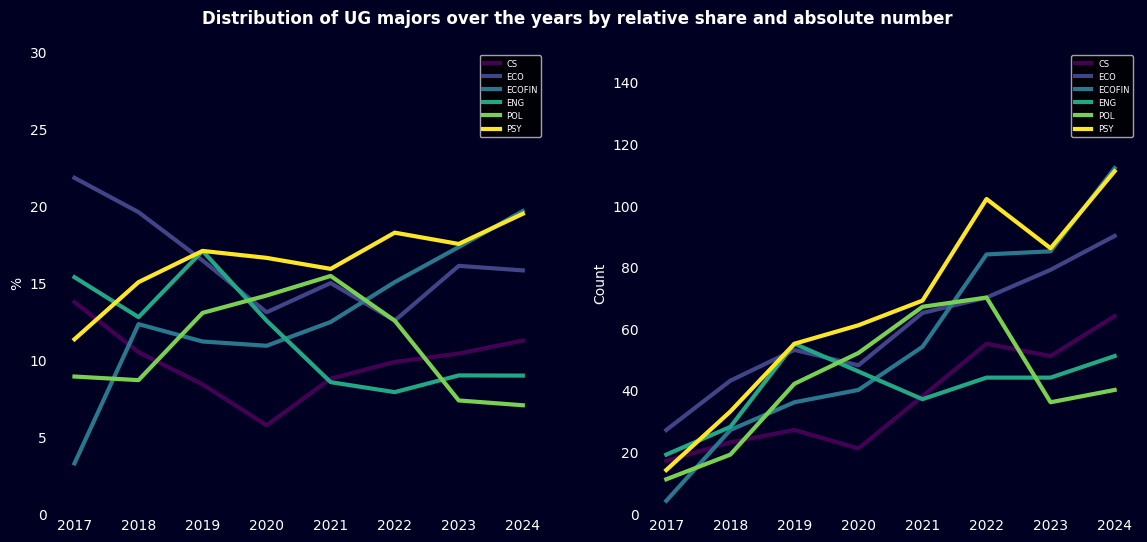

In [564]:
category_counts = df[(df["grad"] <= 2024) & (df["program"] == "UG")].groupby(['grad', 'major']).size().reset_index(name='count')
yearly_totals = category_counts.groupby('grad')['count'].sum().reset_index()
category_counts = category_counts[category_counts["major"].isin(list(df["major"].value_counts().reset_index()["major"].iloc[:6]))]

category_counts = category_counts.merge(yearly_totals, on='grad', suffixes=('', '_total'))
category_counts['percentage'] = (category_counts['count'] / category_counts['count_total']) * 100
pivot_df_count = category_counts.pivot(index='grad', columns='major', values='count').fillna(0)
pivot_df_share = category_counts.pivot(index='grad', columns='major', values='percentage').fillna(0)

fig, axes = plt.subplots(ncols=2, sharex=True, figsize=(14, 6), facecolor="#000022")
fig.suptitle("Distribution of UG majors over the years by relative share and absolute number", weight="bold", x=0.5, y=0.95, fontsize=12)

pivot_df_share.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[0])
pivot_df_count.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[1])

axes[0].set_ylim(0, 30)
axes[0].set_ylabel("%", fontsize=10)
axes[1].set_ylim(0, 150)
axes[1].set_ylabel("Count", fontsize=10)

for ax in axes:
    ax.set_facecolor("#000022")
    ax.set_xlabel("")
    ax.tick_params(axis='x', which='both', length=0)
    ax.tick_params(axis='y', which='both', length=0)

    ax.legend(fontsize=6, loc="upper right")
    ax.grid(False)
    plt.setp(ax.spines.values(), lw=0)

In [565]:
category_counts = df[(df["grad"] <= 2024) & (df["program"] == "UG")].groupby(['grad', 'major']).size().reset_index(name='count')
yearly_totals = category_counts.groupby('grad')['count'].sum().reset_index()
category_counts = category_counts[category_counts["major"].isin(list(df["major"].value_counts().reset_index()["major"].iloc[:6]))]

category_counts = category_counts.merge(yearly_totals, on='grad', suffixes=('', '_total'))
category_counts['percentage'] = (category_counts['count'] / category_counts['count_total']) * 100
pivot_df = category_counts.pivot(index='grad', columns='major', values='percentage').fillna(0)

ax = pivot_df.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis")
plt.title('Popular Majors at Ashoka over the years', weight="bold", fontsize=12)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')
plt.gcf().set_size_inches(12, 6)

ax.set_ylim(3, 25)
plt.xlabel('Graduating Year', fontsize=10)
plt.ylabel('%', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.legend(fontsize=8, loc="upper right")
plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.savefig(f"./images/popular.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
plt.clf()

<Figure size 1200x600 with 0 Axes>

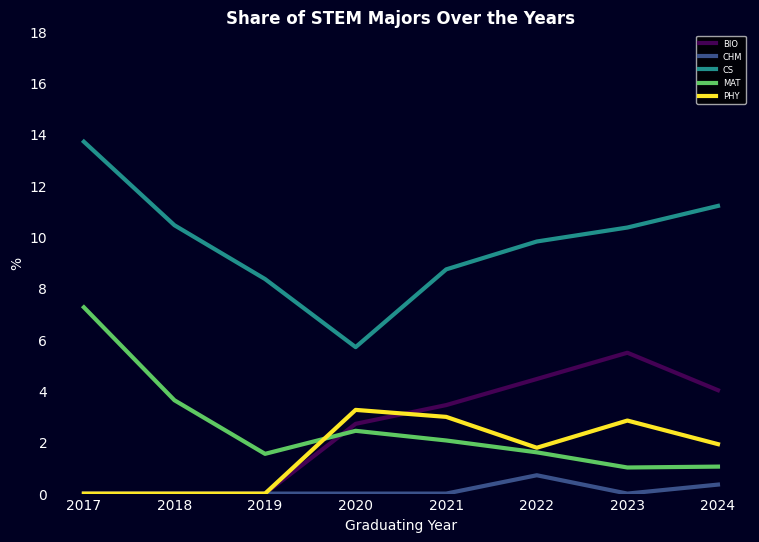

In [566]:
category_counts = df[(df["grad"] <= 2024) & (df["program"] == "UG")].groupby(['grad', 'major']).size().reset_index(name='count')
yearly_totals = category_counts.groupby('grad')['count'].sum().reset_index()
category_counts = category_counts[(category_counts["major"].isin(["CS", "MAT", "BIO", "PHY", "CHM"]))]

category_counts = category_counts.merge(yearly_totals, on='grad', suffixes=('', '_total'))
category_counts['percentage'] = (category_counts['count'] / category_counts['count_total']) * 100
pivot_df = category_counts.pivot(index='grad', columns='major', values='percentage').fillna(0)

ax = pivot_df.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis")
plt.title('Share of STEM Majors Over the Years', weight="bold", fontsize=12)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')
plt.gcf().set_size_inches(9, 6)

ax.set_ylim(0, 18)
plt.xlabel('Graduating Year', fontsize=10)
plt.ylabel('%', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.legend(fontsize=6, loc="upper right")
plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.show()
# plt.savefig(f"./major_minor/stem.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
# plt.clf()

In [567]:
category_counts = df[(df["grad"] <= 2024) & (df["program"] == "UG")].groupby(['grad', 'major']).size().reset_index(name='count')
yearly_totals = category_counts.groupby('grad')['count'].sum().reset_index()
category_counts = category_counts[(category_counts["major"].isin(["SOA", "PHI", "HIS", "POL", "ENG"]))]

category_counts = category_counts.merge(yearly_totals, on='grad', suffixes=('', '_total'))
category_counts['percentage'] = (category_counts['count'] / category_counts['count_total']) * 100
pivot_df = category_counts.pivot(index='grad', columns='major', values='percentage').fillna(0)

ax = pivot_df.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis")
plt.title('Share of Humanities Majors Over the Years', weight="bold", fontsize=12, pad=40)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')
plt.gcf().set_size_inches(12, 6)

ax.set_ylim(0, 18)
plt.xlabel('Graduating Year', fontsize=10)
plt.ylabel('%', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.legend(fontsize=8, loc="upper right")
plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

# plt.show()
plt.savefig(f"./images/humanities.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
plt.clf()

<Figure size 1200x600 with 0 Axes>

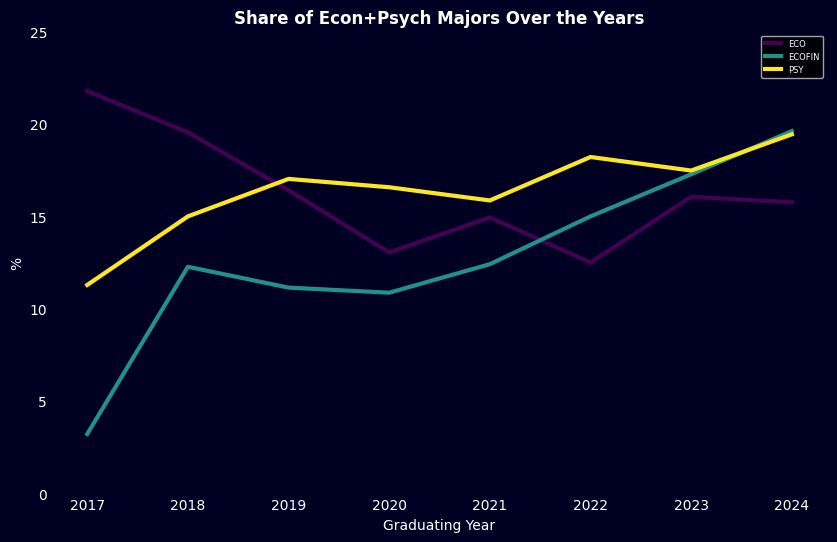

In [568]:
category_counts = df[(df["grad"] <= 2024) & (df["program"] == "UG")].groupby(['grad', 'major']).size().reset_index(name='count')
yearly_totals = category_counts.groupby('grad')['count'].sum().reset_index()
category_counts = category_counts[(category_counts["major"].isin(["ECO", "ECOFIN", "PSY"]))]

category_counts = category_counts.merge(yearly_totals, on='grad', suffixes=('', '_total'))
category_counts['percentage'] = (category_counts['count'] / category_counts['count_total']) * 100
pivot_df = category_counts.pivot(index='grad', columns='major', values='percentage').fillna(0)

ax = pivot_df.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis")
plt.title('Share of Econ+Psych Majors Over the Years', weight="bold", fontsize=12)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')
plt.gcf().set_size_inches(10, 6)

ax.set_ylim(0, 25)
plt.xlabel('Graduating Year', fontsize=10)
plt.ylabel('%', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.legend(fontsize=6, loc="upper right")
plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.show()

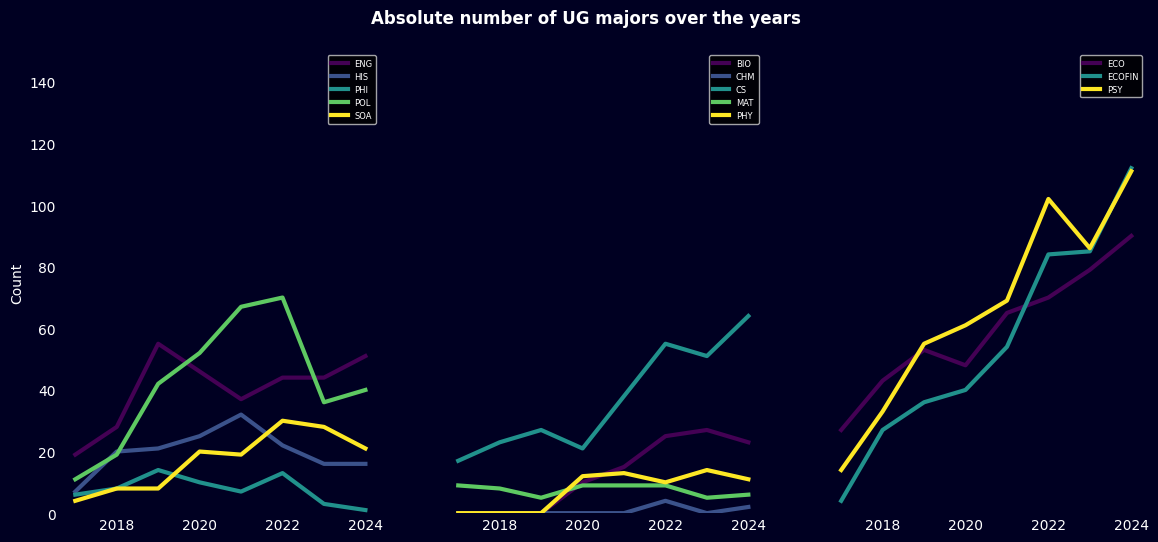

In [569]:
category_counts = df[(df["grad"] <= 2024) & (df["program"] == "UG")].groupby(['grad', 'major']).size().reset_index(name='count')
yearly_totals = category_counts.groupby('grad')['count'].sum().reset_index()

category_counts = category_counts.merge(yearly_totals, on='grad', suffixes=('', '_total'))
category_counts['percentage'] = (category_counts['count'] / category_counts['count_total']) * 100

core_counts = category_counts[(category_counts["major"].isin(["ECO", "ECOFIN", "PSY"]))]
hum_counts = category_counts[(category_counts["major"].isin(["SOA", "PHI", "HIS", "POL", "ENG"]))]
stem_counts = category_counts[(category_counts["major"].isin(["CS", "MAT", "BIO", "PHY", "CHM"]))]

core_pivot_df_count = core_counts.pivot(index='grad', columns='major', values='count').fillna(0)
hum_pivot_df_count = hum_counts.pivot(index='grad', columns='major', values='count').fillna(0)
stem_pivot_df_count = stem_counts.pivot(index='grad', columns='major', values='count').fillna(0)

fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(14, 6), facecolor="#000022")
fig.suptitle("Absolute number of UG majors over the years", weight="bold", x=0.5, y=0.95, fontsize=12)

hum_pivot_df_count.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[0])
stem_pivot_df_count.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[1])
core_pivot_df_count.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[2])

axes[0].set_ylim(0, 150)
axes[0].set_ylabel("Count", fontsize=10)
axes[1].set_ylim(0, 150)
axes[1].set_ylabel("Count", fontsize=10)
axes[1].set_ylim(0, 150)
axes[1].set_ylabel("Count", fontsize=10)

for ax in axes:
    ax.set_facecolor("#000022")
    ax.set_xlabel("")
    ax.tick_params(axis='x', which='both', length=0)
    ax.tick_params(axis='y', which='both', length=0)

    ax.legend(fontsize=6, loc="upper right")
    ax.grid(False)
    plt.setp(ax.spines.values(), lw=0)

plt.show()
# plt.savefig(f"./major_minor/comparison.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
# plt.clf()

### Minors over time
How number of students per minor has changed over the years

In [570]:
df["minor"] = df["minor"].apply(lambda x: x.split(",")[0] if "," in str(x) else x)
minor_share = (df[df["program"] == "UG"].fillna("None").groupby(["batch", "grad"])["minor"].value_counts() / df[df["program"] == "UG"].groupby(["batch", "grad"])["batch"].value_counts() * 100).reset_index()
minor_share["abs"] = df[df["program"] == "UG"].fillna("None").groupby(["batch", "grad"])["minor"].value_counts().reset_index()["count"]
minor_share = minor_share[(minor_share["grad"] < 2025) & (minor_share["abs"] >= 3)]
minor_share["type"] = minor_share["minor"].apply(lambda x: "STEM" if x in ["PHY", "BIO", "CS", "MAT", "CHM"] else "Humanities" if x in ["ENG", "CW", "CHI", "ES", "SOA", "PHI", "HIS", "IR", "POL"] else "MS,PA,VA" if x in ["MS", "PA", "VA"] else "ECO,PSY" if x in ["ECO", "PSY"] else x)
minor_share

,batch,grad,minor,count,abs,type
0,UG 2014-17,2017.0,None,62.096774,77,None
1,UG 2014-17,2017.0,CS,4.032258,5,STEM
2,UG 2014-17,2017.0,PA,4.032258,5,"MS,PA,VA"
3,UG 2014-17,2017.0,PHI,4.032258,5,Humanities
4,UG 2014-17,2017.0,SOA,3.225806,4,Humanities
...,...,...,...,...,...,...
148,UG 2021-24,2024.0,VA,1.050788,6,"MS,PA,VA"
149,UG 2021-24,2024.0,HIS,0.875657,5,Humanities
150,UG 2021-24,2024.0,CW,0.700525,4,Humanities
151,UG 2021-24,2024.0,CHI,0.525394,3,Humanities


In [571]:
minortype_share = minor_share.groupby(["type", "grad", "batch"])["count"].sum().reset_index()
minortype_share

,type,grad,batch,count
0,"ECO,PSY",2017.0,UG 2014-17,2.419355
1,"ECO,PSY",2018.0,UG 2015-18,5.454545
2,"ECO,PSY",2019.0,UG 2016-19,7.430341
3,"ECO,PSY",2020.0,UG 2017-20,5.706522
4,"ECO,PSY",2021.0,UG 2018-21,5.057471
5,"ECO,PSY",2022.0,UG 2019-22,6.428571
6,"ECO,PSY",2023.0,UG 2020-23,5.487805
7,"ECO,PSY",2024.0,UG 2021-24,6.304729
8,ENT,2018.0,UG 2015-18,2.727273
9,ENT,2019.0,UG 2016-19,4.334365


In [572]:
ax = minortype_share[minortype_share["type"].isin(["Humanities", "ENT", "None"])].pivot(index='grad', columns='type', values='count').plot(kind='line', linewidth=3, fontsize=10, logy=False, legend=True, cmap="viridis_r")
plt.title('Share of UG Minors/Concentrations over the years', weight="bold", fontsize=12, pad=20)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')

plt.xlabel('Graduating Year', fontsize=10)
plt.ylabel('%', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

ax.legend(title="", fontsize=11)
plt.grid(False)
plt.setp(ax.spines.values(), lw=0)
plt.gcf().set_size_inches(12, 6)

# plt.show()
plt.savefig(f"./images/minors.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
plt.clf()

<Figure size 1200x600 with 0 Axes>

In [573]:
nz_df = df[df["minor"].notna()]
flows = list((nz_df[nz_df["batch"] == "UG 2014-17"][["major", "minor"]].value_counts()).reset_index().apply(lambda x: (x["major"] + " ", x["minor"], x["count"]), axis=1))

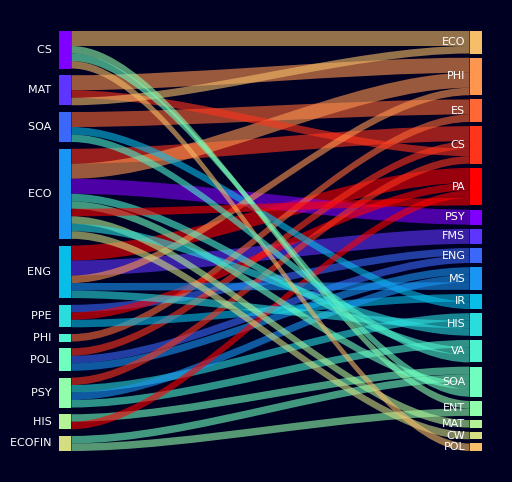

In [574]:
fig = plt.figure(figsize=(6, 6))
s = Sankey(flows=flows, flow_color_mode='destination', cmap=plt.get_cmap("rainbow", 16),
           node_opts=dict(label_pos="left", label_opts={"fontsize": 8}, label_format='{label}'))
s.draw()

fig.patch.set_facecolor('#000022')

plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.show()
# plt.savefig(f"./major_minor/u17combinations.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
# plt.clf()

In [575]:
flows

[('CS ', 'ECO', 2),
 ('MAT ', 'PHI', 2),
 ('SOA ', 'ES', 2),
 ('ECO ', 'CS', 2),
 ('ENG ', 'PA', 2),
 ('ECO ', 'PHI', 2),
 ('ECO ', 'PSY', 2),
 ('ENG ', 'FMS', 2),
 ('PPE ', 'ENG', 1),
 ('PHI ', 'ES', 1),
 ('POL ', 'CS', 1),
 ('POL ', 'ENG', 1),
 ('POL ', 'MS', 1),
 ('PPE ', 'PA', 1),
 ('PPE ', 'IR', 1),
 ('MAT ', 'CS', 1),
 ('PSY ', 'CS', 1),
 ('PSY ', 'HIS', 1),
 ('PSY ', 'MS', 1),
 ('PSY ', 'VA', 1),
 ('SOA ', 'IR', 1),
 ('MAT ', 'ECO', 1),
 ('ENG ', 'PHI', 1),
 ('HIS ', 'SOA', 1),
 ('HIS ', 'PA', 1),
 ('CS ', 'ENT', 1),
 ('ENG ', 'MS', 1),
 ('ENG ', 'HIS', 1),
 ('ECOFIN ', 'SOA', 1),
 ('ECOFIN ', 'ENT', 1),
 ('ECO ', 'VA', 1),
 ('ECO ', 'SOA', 1),
 ('ECO ', 'PA', 1),
 ('ECO ', 'MAT', 1),
 ('ECO ', 'HIS', 1),
 ('ECO ', 'CW', 1),
 ('CS ', 'SOA', 1),
 ('CS ', 'POL', 1),
 ('SOA ', 'VA', 1)]

In [576]:
flows = list((nz_df[nz_df["batch"] == "UG 2021-24"][["major", "minor"]].value_counts()).reset_index().apply(lambda x: (x["major"] + " ", x["minor"], x["count"]), axis=1))[:33]

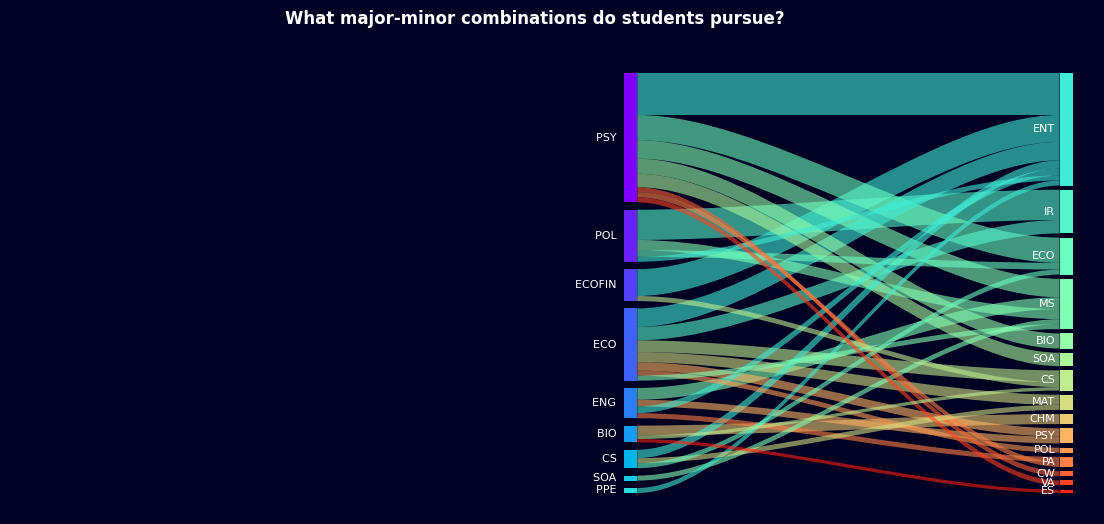

In [577]:
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(14, 6), facecolor="#000022")
fig.suptitle("What major-minor combinations do students pursue?", weight="bold", x=0.5, y=0.95, fontsize=12)

ug17flows = list((nz_df[nz_df["batch"] == "UG 2014-17"][["major", "minor"]].value_counts()).reset_index().apply(lambda x: (x["major"] + " ", x["minor"], x["count"]), axis=1))
ug24flows = list((nz_df[nz_df["batch"] == "UG 2021-24"][["major", "minor"]].value_counts()).reset_index().apply(lambda x: (x["major"] + " ", x["minor"], x["count"]), axis=1))[:33]

# s1 = Sankey(flows=ug17flows, flow_color_mode='destination', cmap=plt.get_cmap("rainbow", 16),
#            node_opts=dict(label_pos="left", label_opts={"fontsize": 8}, label_format='{label}'))
# s1.draw()

s2 = Sankey(flows=ug24flows, flow_color_mode='destination', cmap=plt.get_cmap("rainbow", 25),
           node_opts=dict(label_pos="left", label_opts={"fontsize": 8}, label_format='{label}'))
s2.draw()

for ax in axes:
    ax.set_facecolor("#000022")
    ax.tick_params(axis='x', which='both', length=0)
    ax.tick_params(axis='y', which='both', length=0)

    ax.grid(False)
    plt.setp(ax.spines.values(), lw=0)
    ax.set_axis_off()

plt.show()
# plt.savefig(f"./major_minor/ug24combinations.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
# plt.clf()

### ASP by major and minor
Who does ASP, and what do they do?

In [578]:
ugs = df[df["program"] == "UG"]
asps = df[df["program"] == "ASP"]

asps["ug_grad"] = asps["grad"] - 1
asps["major"] = asps["major"] + " "
asps["minor"] = asps["minor"].apply(lambda x: x.replace(",", " ,") if (not pd.isna(x) and type(x) == str and "," in x) else x + " " if not pd.isna(x) else None)

In [579]:
all_people = pd.merge(ugs, asps, how="left", left_on=["name", "grad"], right_on=["name", "ug_grad"], suffixes=("_ug", "_asp"))
all_people["subject_asp"] = all_people.apply(lambda x: x["minor_asp"].split(",")[0] if (not pd.isna(x["minor_asp"]) and type(x["minor_asp"]) == str and "," in x["minor_asp"]) else x["minor_asp"] if not pd.isna(x["minor_asp"]) else x["major_asp"] if not pd.isna(x["major_asp"]) else None, axis=1)
all_people["major_asp"] = all_people.apply(lambda x: x["major_asp"] if not pd.isna(x["major_asp"]) else x["minor_asp"].split(",")[0] if (not pd.isna(x["minor_asp"]) and type(x["minor_asp"]) == str and "," in x["minor_asp"]) else x["minor_asp"] if not pd.isna(x["minor_asp"]) else None, axis=1)

all_people.drop(["email_ug", "id_ug", "name", "email_asp", "id_asp"], axis=1)

,batch_ug,status_ug,major_ug,minor_ug,program_ug,grad_ug,batch_asp,status_asp,major_asp,minor_asp,program_asp,grad_asp,ug_grad,subject_asp
0,UG 2014-17,Graduated,PSY,NaN,UG,2017.0,NaN,NaN,None,NaN,NaN,NaN,NaN,None
1,UG 2014-17,Graduated,ECO,NaN,UG,2017.0,NaN,NaN,None,NaN,NaN,NaN,NaN,None
2,UG 2014-17,Graduated,MAT,NaN,UG,2017.0,ASP 2017-18,Graduated,None,None,ASP,2018.0,2017.0,None
3,UG 2014-17,Graduated,ECO,CW,UG,2017.0,ASP 2017-18,Graduated,CW,CW,ASP,2018.0,2017.0,CW
4,UG 2014-17,Graduated,PSY,MS,UG,2017.0,ASP 2017-18,Graduated,PSY,MS,ASP,2018.0,2017.0,MS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3088,UG 2021-24,Graduated,ECOFIN,NaN,UG,2024.0,NaN,NaN,None,NaN,NaN,NaN,NaN,None
3089,UG 2021-24,Graduated,POL,ECO,UG,2024.0,NaN,NaN,None,NaN,NaN,NaN,NaN,None
3090,UG 2021-24,Graduated,CS,NaN,UG,2024.0,NaN,NaN,None,NaN,NaN,NaN,NaN,None
3091,UG 2021-24,Graduated,MAT,NaN,UG,2024.0,NaN,NaN,None,NaN,NaN,NaN,NaN,None


In [580]:
all_people["major_asp"] = all_people["major_asp"].fillna("None")
all_people["minor_ug"] = all_people["minor_ug"].fillna("None")
all_people["minor_asp"] = all_people["minor_asp"].fillna("None")
all_people["subject_asp"] = all_people["subject_asp"].fillna("None")
people = all_people[~all_people["status_asp"].isnull()]
people.drop(["email_ug", "id_ug", "name", "email_asp", "id_asp"], axis=1)

,batch_ug,status_ug,major_ug,minor_ug,program_ug,grad_ug,batch_asp,status_asp,major_asp,minor_asp,program_asp,grad_asp,ug_grad,subject_asp
2,UG 2014-17,Graduated,MAT,None,UG,2017.0,ASP 2017-18,Graduated,None,None,ASP,2018.0,2017.0,None
3,UG 2014-17,Graduated,ECO,CW,UG,2017.0,ASP 2017-18,Graduated,CW,CW,ASP,2018.0,2017.0,CW
4,UG 2014-17,Graduated,PSY,MS,UG,2017.0,ASP 2017-18,Graduated,PSY,MS,ASP,2018.0,2017.0,MS
6,UG 2014-17,Graduated,ECO,PHI,UG,2017.0,ASP 2017-18,Graduated,MAT,MAT,ASP,2018.0,2017.0,MAT
8,UG 2014-17,Graduated,PPE,ENG,UG,2017.0,ASP 2017-18,Graduated,PPE,ENG,ASP,2018.0,2017.0,ENG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,UG 2020-23,Graduated,ECO,ENT,UG,2023.0,ASP 2023-24,Graduated,ENT,ENT,ASP,2024.0,2023.0,ENT
2515,UG 2020-23,Graduated,PSY,IR,UG,2023.0,ASP 2023-24,Graduated,PSY,ENT,ASP,2024.0,2023.0,ENT
2517,UG 2020-23,Graduated,ECOHIS,None,UG,2023.0,ASP 2023-24,Graduated,None,None,ASP,2024.0,2023.0,None
2519,UG 2020-23,Graduated,ECOFIN,ENT,UG,2023.0,ASP 2023-24,Graduated,ENT,ENT,ASP,2024.0,2023.0,ENT


In [581]:
asp_counts = all_people[["batch_ug", "status_asp", "grad_ug", "major_ug"]].fillna("None").value_counts().reset_index(drop=False).sort_values(by=["batch_ug"])
asp_counts = asp_counts[(asp_counts["status_asp"] != "Not Graduated") & (asp_counts["grad_ug"] < 2025)]
asp_share = (asp_counts.groupby(["batch_ug", "status_asp", "grad_ug", "major_ug"])["count"].sum() / asp_counts.groupby(["batch_ug", "grad_ug", "major_ug"])["count"].sum() * 100).reset_index()
asp_share = asp_share[asp_share["status_asp"] != "None"].groupby(["batch_ug", "grad_ug", "major_ug"])["count"].sum().reset_index().sort_values(by=["major_ug", "batch_ug"])
asp_share

,batch_ug,grad_ug,major_ug,count
32,UG 2017-20,2020.0,BIO,80.000000
46,UG 2018-21,2021.0,BIO,66.666667
59,UG 2019-22,2022.0,BIO,84.000000
74,UG 2020-23,2023.0,BIO,77.777778
60,UG 2019-22,2022.0,CHM,50.000000
...,...,...,...,...
21,UG 2015-18,2018.0,SOA,12.500000
45,UG 2017-20,2020.0,SOA,65.000000
58,UG 2018-21,2021.0,SOA,36.842105
73,UG 2019-22,2022.0,SOA,36.666667


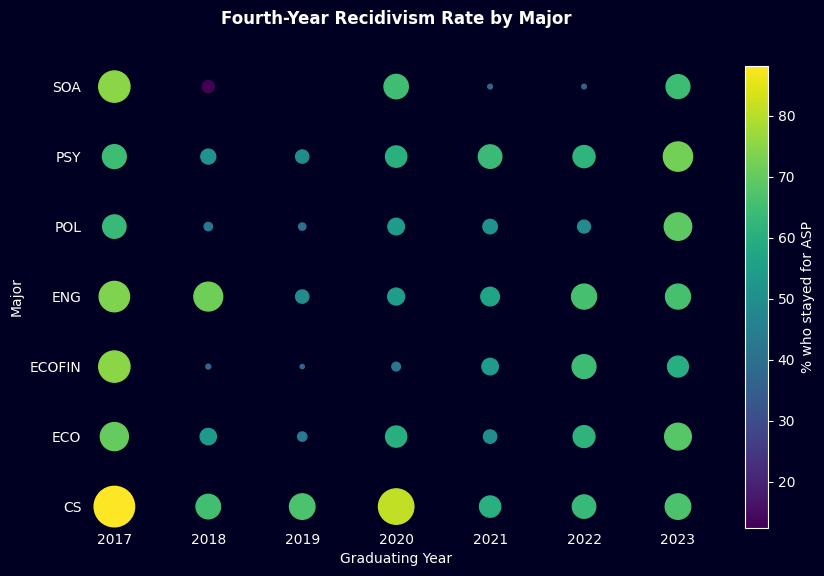

In [582]:
asp_share = asp_share[asp_share["major_ug"].isin(["ENG", "CS", "ECO", "ECOFIN", "PSY", "POL", "SOA"])]
asp_share["count2"] = asp_share["count"].apply(lambda x: ((float(x)-30)/2)**2)

ax = asp_share.plot(kind="scatter", x="grad_ug", y="major_ug", c="count", s="count2")
plt.title('Fourth-Year Recidivism Rate by Major', weight="bold", fontsize=12, pad=30)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')
plt.gcf().set_size_inches(10, 6)

plt.xlabel('Graduating Year', fontsize=10)
plt.ylabel('Major', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.gcf().get_axes()[1].set_ylabel("% who stayed for ASP")

plt.show()
# plt.savefig(f"./major_minor/recidivism.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
# plt.clf()

In [583]:
recent = people[people["grad_ug"] > 2021]
flows = list((recent[["major_ug", "minor_asp"]].value_counts()).reset_index().apply(
    lambda x: (x["major_ug"], x["minor_asp"], x["count"]), axis=1))[:37]

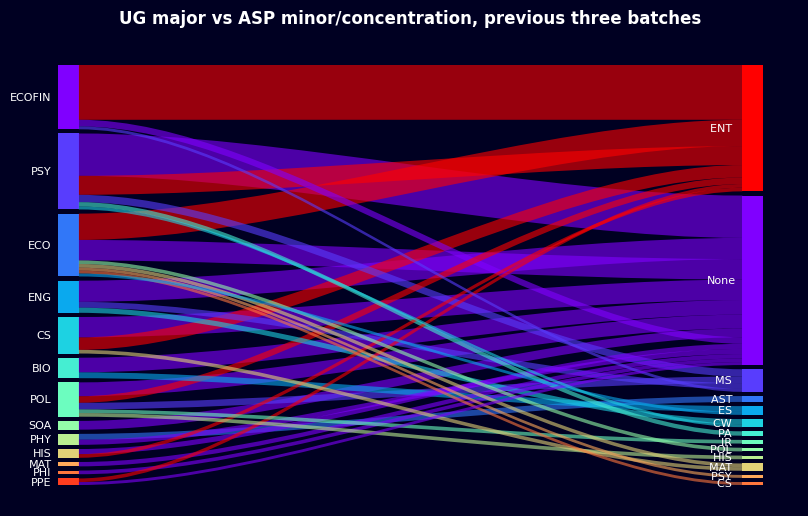

In [584]:
fig = plt.figure(figsize=(10, 6))
s = Sankey(flows=flows, flow_color_mode='destination', cmap=plt.get_cmap("rainbow", 14),
           node_opts=dict(label_pos="left", label_opts={"fontsize": 8}, label_format='{label}'))
plt.title("UG major vs ASP minor/concentration, previous three batches", weight="bold", fontsize=12, pad=15)

fig.patch.set_facecolor('#000022')

plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

s.draw()
# plt.savefig(f"./major_minor/aspchoices.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
# plt.clf()

### Gender over time
What's the gender split, and how does it vary over time and major?

In [585]:
def fuzzy_merge(df_1, df_name, key1, key2, threshold=90, limit=3):

    column = df_name[key2].tolist()

    matches = df_1[key1].apply(lambda x: process.extract(x, column, limit=limit))
    df_1['matches'] = matches

    m2 = df_1['matches'].apply(lambda x: ', '.join([str(i[0]) for i in x if i[1] >= threshold]).split(",")[0])
    m2 = m2.apply(lambda x: x if x != "nan" else "")
    df_1['matches'] = m2

    def get_probability(x):
        if x in df_name[key2].values:
            return df_name.loc[df_name[key2] == x, "Male Probability"].values[0]
        return None

    df_1['probability'] = df_1['matches'].apply(get_probability)

    return df_1

In [586]:
# name_gender = pd.read_csv("./gender/indian_first_names.csv").drop(["Index", "Count"], axis=1)
# name_gender["Name"] = name_gender["Name"].apply(lambda x: x.capitalize())
# df["first_name"] = df["name"].apply(lambda x: x.split(" ")[0])
# gender_df = fuzzy_merge(df, name_gender, 'first_name', 'Name', threshold=60)
# gender_df["gender"] = gender_df["probability"].apply(lambda x: "male" if x > 0.8 else "female")
# gender_df.to_csv("./gender_students.csv")
gender_df = pd.read_csv("./gender/gender_df.csv", index_col=0)
gender_df.drop(["email", "id", "name"], axis=1)

,batch,status,major,minor,program,grad,cgpa,mgpa,gender,first_name,matches,probability
321,UG 2014-17,Graduated,CS,NaN,UG,2017,3.28,3.28,female,Shivangi,Shivangi,0.0
415,UG 2014-17,Graduated,CS,POL,UG,2017,3.16,3.08,female,Samridh,Samridhi,0.0
727,UG 2014-17,Graduated,CS,ENT,UG,2017,2.74,2.43,female,Mihika,Ishika,0.0
907,UG 2014-17,Graduated,ECO,NaN,UG,2017,3.63,3.64,female,Krathika,Kratika,0.0
969,UG 2014-17,Graduated,ECO,NaN,UG,2017,3.10,3.04,female,Smera,Era,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6665,UG 2023-27,Enrolled,NaN,NaN,UG,2027,3.44,0.00,male,Vivaan,Vivian,1.0
6674,UG 2023-27,Enrolled,NaN,NaN,UG,2027,3.50,0.00,male,Yashwanth,Yashwanth,1.0
6677,UG 2023-27,Enrolled,NaN,NaN,UG,2027,3.19,0.00,male,Yuvraj,Yuvraj,1.0
6678,UG 2023-27,Enrolled,NaN,NaN,UG,2027,0.00,0.00,male,Zahra,Abhra,1.0


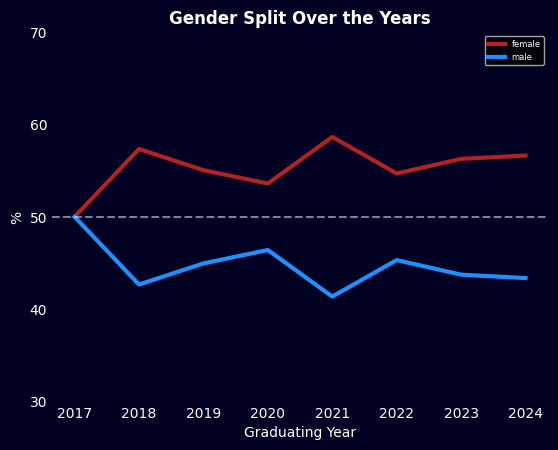

In [587]:
gender_counts = gender_df[(gender_df["grad"] <= 2025) & (gender_df["program"] == "UG")].groupby(['grad', 'gender']).size().reset_index(name='count')
yearly_totals = gender_counts.groupby('grad')['count'].sum().reset_index()
gender_counts = gender_counts[gender_counts["gender"].isin(["male", "female"])]

gender_counts = gender_counts.merge(yearly_totals, on='grad', suffixes=('', '_total'))
gender_counts['percentage'] = (gender_counts['count'] / gender_counts['count_total']) * 100
pivot_df = gender_counts.pivot(index='grad', columns='gender', values='percentage').fillna(0)

ax = pivot_df.plot(kind='line', linewidth=3, fontsize=10, color=["firebrick", "dodgerblue"])
plt.title('Gender Split Over the Years', weight="bold", fontsize=12)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')

ax.set_yticks([x for x in range(0, 110, 10)])
ax.set_ylim(30, 70)
plt.xlabel('Graduating Year', fontsize=10)
plt.ylabel('%', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.axhline(y = 50, color = 'white', linestyle = 'dashed', alpha=0.5)
plt.legend(fontsize=6, loc="upper right")
plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.show()

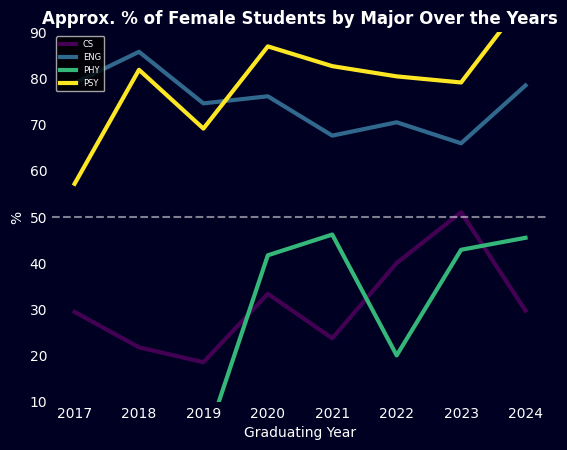

In [588]:
gender_counts = gender_df[(gender_df["grad"] <= 2025) & (gender_df["program"] == "UG")].groupby(['grad', 'gender', 'major']).size().reset_index(name='count')
yearly_totals = category_counts.groupby(['grad', 'major'])['count'].sum().reset_index()
gender_counts = gender_counts[(gender_counts["gender"].isin(["male", "female"])) & (gender_counts["major"].isin(["PHY", "PSY", "CS", "ENG"]))]

gender_counts = gender_counts.merge(yearly_totals, on=['grad', 'major'], suffixes=('', '_total'))
gender_counts['percentage'] = (gender_counts['count'] / gender_counts['count_total']) * 100
gender_counts = gender_counts[gender_counts["gender"] == "female"]

pivot_df = gender_counts.pivot(index='grad', columns=['major'], values='percentage').fillna(0)

ax = pivot_df.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis")
plt.title('Approx. % of Female Students by Major Over the Years', weight="bold", fontsize=12)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')

ax.set_yticks([x for x in range(0, 110, 10)])
ax.set_ylim(10, 90)
plt.xlabel('Graduating Year', fontsize=10)
plt.ylabel('%', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.axhline(y = 50, color = 'white', linestyle = 'dashed', alpha=0.5)
plt.legend(fontsize=6, loc="upper left")
plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.show()

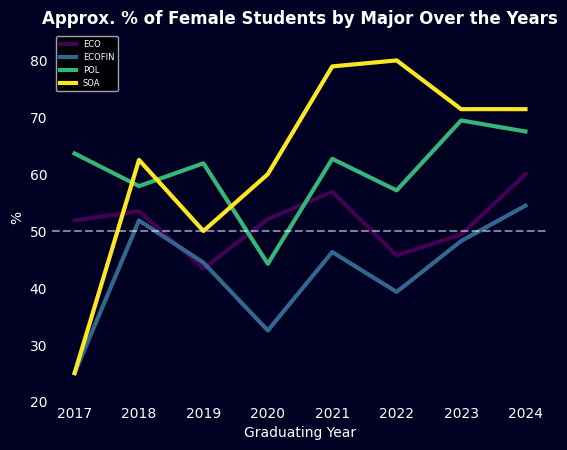

In [589]:
gender_counts = gender_df[(gender_df["grad"] <= 2025) & (gender_df["program"] == "UG")].groupby(['grad', 'gender', 'major']).size().reset_index(name='count')
yearly_totals = category_counts.groupby(['grad', 'major'])['count'].sum().reset_index()
gender_counts = gender_counts[(gender_counts["gender"].isin(["male", "female"])) & (gender_counts["major"].isin(["POL", "ECO", "ECOFIN", "SOA"]))]

gender_counts = gender_counts.merge(yearly_totals, on=['grad', 'major'], suffixes=('', '_total'))
gender_counts['percentage'] = (gender_counts['count'] / gender_counts['count_total']) * 100
gender_counts = gender_counts[gender_counts["gender"] == "female"]

pivot_df = gender_counts.pivot(index='grad', columns=['major'], values='percentage').fillna(0)

ax = pivot_df.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis")
plt.title('Approx. % of Female Students by Major Over the Years', weight="bold", fontsize=12)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')

ax.set_yticks([x for x in range(0, 110, 10)])
ax.set_ylim(20, 85)
plt.xlabel('Graduating Year', fontsize=10)
plt.ylabel('%', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.axhline(y = 50, color = 'white', linestyle = 'dashed', alpha=0.5)
plt.legend(fontsize=6, loc="upper left")
plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.show()

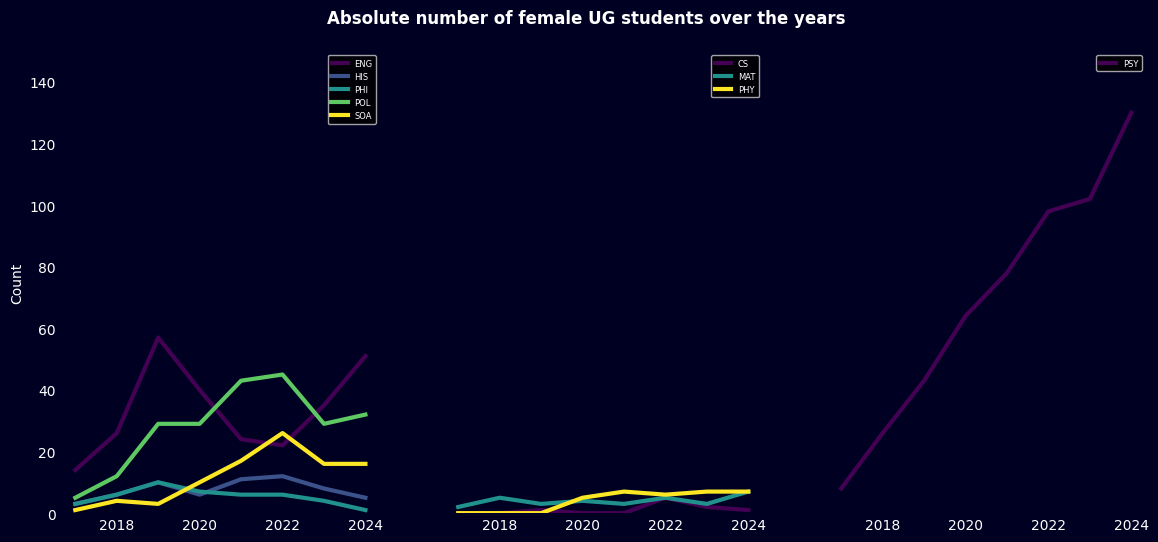

In [590]:
gender_counts = gender_df[(gender_df["grad"] <= 2024) & (df["program"] == "UG")].groupby(['grad', 'gender', 'major']).size().reset_index(name='count')
yearly_totals = gender_counts.groupby(['grad', 'major'])['count'].sum().reset_index()

gender_counts = gender_counts.merge(yearly_totals, on=['grad', 'major'], suffixes=('', '_total'))
gender_counts['percentage'] = (gender_counts['count'] / gender_counts['count_total']) * 100
gender_counts = gender_counts[gender_counts["gender"] == "female"]

core_counts = gender_counts[(gender_counts["major"].isin(["ECO", "ECOFIN", "PSY"]))]
hum_counts = gender_counts[(gender_counts["major"].isin(["SOA", "PHI", "HIS", "POL", "ENG"]))]
stem_counts = gender_counts[(gender_counts["major"].isin(["CS", "MAT", "BIO", "PHY", "CHM"]))]

core_pivot_df_count = core_counts.pivot(index='grad', columns='major', values='count').fillna(0)
hum_pivot_df_count = hum_counts.pivot(index='grad', columns='major', values='count').fillna(0)
stem_pivot_df_count = stem_counts.pivot(index='grad', columns='major', values='count').fillna(0)

fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(14, 6), facecolor="#000022")
fig.suptitle("Absolute number of female UG students over the years", weight="bold", x=0.5, y=0.95, fontsize=12)

hum_pivot_df_count.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[0])
stem_pivot_df_count.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[1])
core_pivot_df_count.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[2])

axes[0].set_ylim(0, 150)
axes[0].set_ylabel("Count", fontsize=10)
axes[1].set_ylim(0, 150)
axes[1].set_ylabel("Count", fontsize=10)
axes[1].set_ylim(0, 150)
axes[1].set_ylabel("Count", fontsize=10)

for ax in axes:
    ax.set_facecolor("#000022")
    ax.set_xlabel("")
    ax.tick_params(axis='x', which='both', length=0)
    ax.tick_params(axis='y', which='both', length=0)

    ax.legend(fontsize=6, loc="upper right")
    ax.grid(False)
    plt.setp(ax.spines.values(), lw=0)

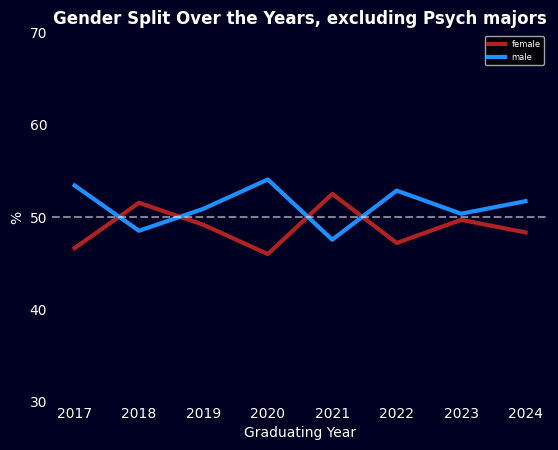

In [591]:
gender_counts = gender_df[(gender_df["grad"] <= 2025) & (gender_df["program"] == "UG") & ~((gender_df["major"] == "PSY") & (gender_df["gender"] == "female"))].groupby(['grad', 'gender']).size().reset_index(name='count')
yearly_totals = gender_counts.groupby('grad')['count'].sum().reset_index()
gender_counts = gender_counts[gender_counts["gender"].isin(["male", "female"])]

gender_counts = gender_counts.merge(yearly_totals, on='grad', suffixes=('', '_total'))
gender_counts['percentage'] = (gender_counts['count'] / gender_counts['count_total']) * 100
pivot_df = gender_counts.pivot(index='grad', columns='gender', values='percentage')

ax = pivot_df.plot(kind='line', linewidth=3, fontsize=10, color=["firebrick", "dodgerblue"])
plt.title('Gender Split Over the Years, excluding Psych majors', weight="bold", fontsize=12)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')

ax.set_yticks([x for x in range(0, 110, 10)])
ax.set_ylim(30, 70)
plt.xlabel('Graduating Year', fontsize=10)
plt.ylabel('%', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.axhline(y = 50, color = 'white', linestyle = 'dashed', alpha=0.5)
plt.legend(fontsize=6, loc="upper right")
plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.show()

In [592]:
gendered_people = pd.merge(gender_df[gender_df["program"] == "UG"].reset_index(drop=True), all_people, how="inner", left_on="email", right_on="email_ug")
gendered_people.drop(["email", "id", "name_x", "email_ug", "id_ug", "name_y", "email_asp", "id_asp"], axis=1)

,batch,status,major,minor,program,grad,cgpa,mgpa,gender,first_name,...,program_ug,grad_ug,batch_asp,status_asp,major_asp,minor_asp,program_asp,grad_asp,ug_grad,subject_asp
0,UG 2014-17,Graduated,CS,NaN,UG,2017,3.28,3.28,female,Shivangi,...,UG,2017.0,ASP 2017-18,Graduated,CS,MS,ASP,2018.0,2017.0,MS
1,UG 2014-17,Graduated,CS,POL,UG,2017,3.16,3.08,female,Samridh,...,UG,2017.0,ASP 2017-18,Graduated,CS,POL,ASP,2018.0,2017.0,POL
2,UG 2014-17,Graduated,CS,ENT,UG,2017,2.74,2.43,female,Mihika,...,UG,2017.0,ASP 2017-18,Graduated,PSY,PSY,ASP,2018.0,2017.0,PSY
3,UG 2014-17,Graduated,ECO,NaN,UG,2017,3.63,3.64,female,Krathika,...,UG,2017.0,ASP 2017-18,Graduated,IR,IR,ASP,2018.0,2017.0,IR
4,UG 2014-17,Graduated,ECO,NaN,UG,2017,3.10,3.04,female,Smera,...,UG,2017.0,NaN,NaN,None,None,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3088,UG 2021-24,Graduated,SOA,MS,UG,2024,3.78,3.81,male,Siddharth,...,UG,2024.0,NaN,NaN,None,None,NaN,NaN,NaN,None
3089,UG 2021-24,Graduated,SOA,CS,UG,2024,2.81,2.77,male,Mohamed,...,UG,2024.0,NaN,NaN,None,None,NaN,NaN,NaN,None
3090,UG 2021-24,Graduated,SOA,NaN,UG,2024,2.34,2.66,male,Kartik,...,UG,2024.0,NaN,NaN,None,None,NaN,NaN,NaN,None
3091,UG 2021-24,Graduated,SOA,ECO,UG,2024,3.59,3.90,female,Sritama,...,UG,2024.0,NaN,NaN,None,None,NaN,NaN,NaN,None


<Axes: xlabel='grad'>

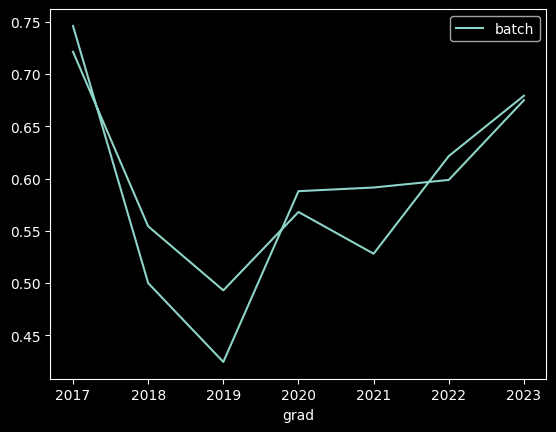

In [593]:
(gendered_people[gendered_people["batch_asp"].notna()].groupby(["gender", "grad"])["batch"].count() / gendered_people.groupby(["gender", "grad"])["batch"].count()).reset_index().plot(y="batch", x="grad")

In [594]:
df[df["name"].str.contains("Debdoot")]

,batch,email,id,name,status,major,minor,program,grad
5016,UG 2021-24,debdoot.ray_ug24@ashoka.edu.in,1020211628,Debdoot Ray,Graduated,ECO,NaN,UG,2024.0
